<a href="https://colab.research.google.com/github/clferreira1985/PUC_RJ-Pos_Ciencia_de_Dados_e_Analytics/blob/main/MVP_Sprint1/MVP_Sprint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prevenção de cancelamentos de hotéis


##### **Contexto:** Com base no dataset, descubra os fatores que levam à rotatividade de funcionários e explore questões importantes, como 'mostre-me uma análise da distância de casa por cargo e rotatividade' ou 'compare o salário mensal médio por educação e rotatividade'. Este é um conjunto de dados fictício criado por cientistas de dados da IBM

** informações sobre os atributos **
 1. Age - Idade
 2. Attrition - Atrito (indica se um funcionário deixou a empresa)
 3. BusinessTravel - Viagem de Negócios (Indica a frequência com que um funcionário viaja a negócios)
 4. DailyRate - Taxa Diária
 5. Department - Departamento
 6. DistanceFromHome - Distância de Casa
 7. Education - Educação
 8. EducationField - Área de Educação
 9. EmployeeCount - Contagem de Funcionários
 10. EmployeeNumber - Número do Funcionário
 11. EnvironmentSatisfaction - Satisfação com o Ambiente
 12. Gender - Gênero
 13. HourlyRate - Taxa por Hora
 14. JobInvolvement - Envolvimento no Trabalho
 15. JobLevel - Nível do Cargo
 16. JobRole - Cargo
 17. JobSatisfaction - Satisfação com o Trabalh
 18. MaritalStatus - Estado Civil
 19. MonthlyIncome - Renda Mensal
 20. MonthlyRate - Taxa Mensal
 21. NumCompaniesWorked - Número de Empresas Trabalhadas
 22. Over18 - Maior de 18 anos
 23. OverTime - Hora Extra
 24. PercentSalaryHike - Aumento Percentual no Salário
 25. PerformanceRating - Avaliação de Desempenho
 26. RelationshipSatisfaction - Satisfação com Relacionamentos
 27. StandardHours - Horas Padrão
 28. StockOptionLevel - Nível de Opções de Ações
 29. TotalWorkingYears - Total de Anos Trabalhados
 30. TrainingTimesLastYear - Número de Treinamentos no Ano Passado
 31. WorkLifeBalance - Equilíbrio entre Trabalho e Vida
 32. YearsAtCompany - Anos na Empresa
 33. YearsInCurrentRole - Anos no Cargo Atual
 34. YearsSinceLastPromotion - Anos desde a Última Promoção
 35. YearsWithCurrManage - Anos com o Gerente Atual


##### **Estrutura:** O notebook está dividido assim:



1. Imports das bibliotecas
2. Acesso e tratamento dos dados
3. Exploratory Data Analysis (EDA)




Visualização gráfica dos dados
Pré-processamento dos dados


```

```


##### **Créditos:** O notebook foi desenvolvido e documentado por:



*   Cleiton Silva


##### **Dataset:** O dataset foi baixado do Kaggle, uma plataforma online voltada para cientistas de dados, entusiastas de aprendizado de máquina e profissionais afins. O uso é estritamente didático. Para mais informações sobre o dataset, veja o link a seguir: [IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data?select=WA_Fn-UseC_-HR-Employee-Attrition.csv)

## 1. Imports das bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import imblearn
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos


##2. Acesso e tratamento dos dados

Essa etapa permite obter uma visão geral do conjunto de dados, incluindo a estrutura dos dados, a presença de valores nulos e a contagem de categorias únicas nas colunas categóricas.

In [2]:
# Carrega o dataset
df = pd.read_csv("https://raw.githubusercontent.com/clferreira1985/Datasets/main/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
#Confiro os dados
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Shape
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# Os valores usados no código abaixo estão  na descrição do dataset do kaggle.

df["EnvironmentSatisfaction"] = df["EnvironmentSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
df["JobInvolvement"] = df["JobInvolvement"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
df["JobSatisfaction"] = df["JobSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
df["PerformanceRating"] = df["PerformanceRating"].replace({1:"Low",2:"Good",3:"Excellent",4:"Outstanding"})
df["RelationshipSatisfaction"] = df["RelationshipSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
df["WorkLifeBalance"] = df["WorkLifeBalance"].replace({1:"Bad",2:"Good",3:"Better",4:"Best"})
df["Education"] = df["Education"].replace({1:"Below College",2:"College",3:"Bachelor",4:"Master",5:"Doctor"})
df["JobLevel"] = df["JobLevel"].replace({1:"Entry Level",2:"Junior Level",3:"Mid Level",
                                           4:"Senior Level",5:"Executive Level"})

In [7]:
#Tem valores duplicados?

df.duplicated().sum()

0

In [8]:
#Identifico a quantidade de valores nulos e seu percentual
df_null = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
df_null["% of Missing Values"] = round((df_null["Total No. of Missing Values"]/len(df))*100,2)
df_null

,Total No. of Missing Values,% of Missing Values
Age,0,0.0
Attrition,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EmployeeCount,0,0.0
EmployeeNumber,0,0.0


In [9]:
# Faço um resumo estatístico do dataset dos valores numericos (média, desvio padrão, mínimo, máximo e os quartis)
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.92,9.14,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.49,403.51,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.19,8.11,1.0,2.00,7.0,14.00,29.0
EmployeeCount,1470.0,1.00,0.00,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.87,602.02,1.0,491.25,1020.5,1555.75,2068.0
HourlyRate,1470.0,65.89,20.33,30.0,48.00,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.93,4707.96,1009.0,2911.00,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.10,7117.79,2094.0,8047.00,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.69,2.50,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.21,3.66,11.0,12.00,14.0,18.00,25.0


In [10]:
cols = ["Over18", "EmployeeCount", "EmployeeNumber", "StandardHours"]
df.drop(columns=cols, inplace=True)

In [11]:
# Faço um resumo estatístico do dataset dos valores categoricos
df.describe(include="O").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
Education,1470,5,Bachelor,572
EducationField,1470,6,Life Sciences,606
EnvironmentSatisfaction,1470,4,High,453
Gender,1470,2,Male,882
JobInvolvement,1470,4,High,868
JobLevel,1470,5,Entry Level,543
JobRole,1470,9,Sales Executive,326


In [12]:
#print todos os valores categorios para dar uma conferida
df_categoricos = df.select_dtypes(include=['object'])
for column_name in df_categoricos.columns:
    unique_values = df_categoricos[column_name].unique()
    print(f"______{column_name}_____")
    print(unique_values)
    print("")
    print("")

______Attrition_____
['Yes' 'No']


______BusinessTravel_____
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


______Department_____
['Sales' 'Research & Development' 'Human Resources']


______Education_____
['College' 'Below College' 'Master' 'Bachelor' 'Doctor']


______EducationField_____
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']


______EnvironmentSatisfaction_____
['Medium' 'High' 'Very High' 'Low']


______Gender_____
['Female' 'Male']


______JobInvolvement_____
['High' 'Medium' 'Very High' 'Low']


______JobLevel_____
['Junior Level' 'Entry Level' 'Mid Level' 'Senior Level' 'Executive Level']


______JobRole_____
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']


______JobSatisfaction_____
['Very High' 'Medium' 'High' 'Low']


______MaritalStatus_____
['Single' 'Married' 'Divorced']


_____

**Resumo:**
* O dataset têm 1470 linhas e 35 colunas
* Não tem valores nulos e duplicados
* Foram excluidas as seguintes colunas por não fornececer insights significativos:
  1. Over18 - A idade mínima é 18, o que indica que todos os funcionários são adultos. Portanto, não há necessidade do atributo para analise
  2. EmployeeCount e StandardHours - O valor do desvio padrão é 0, o que indica que todos os valoes presentes nesse atributo são iguais.
  3. EmployeeNumber - Representa um valor único para cada um dos funcionários, o que não fornecerá insights significativos

## 3. Exploratory Data Analysis (EDA)

In [13]:
def pie_bar_plot(df, col, hue):
    plt.figure(figsize=(14, 6))

    # Conto o valor extraido pela coluna expecificada
    value_counts = df[col].value_counts().sort_index()

    # Primeiro gráfico pizza
    plt.subplot(1, 2, 1)
    ax1 = value_counts
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('viridis', len(ax1))
    plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90,
            colors=colors, textprops={"size":14})
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)

    # Segundo gráfico será barplot
    plt.subplot(1, 2, 2)
    new_df = df[df[hue] == 'Yes']
    value_1 = value_counts
    value_2 = new_df[col].value_counts().sort_index()  # organizo pelo valor da mesma coluna
    ax2 = np.floor((value_2 / value_1) * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, palette='viridis')
    plt.title(f"Attrition Rate by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2):
        plt.text(index, value, str(value) + " (" + str(int(ax2[index])) + "% )", ha="center", va="bottom", size=10)

    plt.tight_layout()
    plt.show()



def hist_with_box(df, col, hue):
    plt.figure(figsize=(13.5, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(x=col, hue=hue, data=df, kde=True, palette='viridis')

    # Configure the x-axis to display integer values and center-align the labels
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90, position=(0.5, 0), ha = 'center')  # Rotate x-axis labels by 90 degrees and center-align

    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)

    plt.subplot(1, 2, 2)
    sns.boxplot(x=hue, y=col, data=df, palette='viridis')
    plt.title(f"Distribution by {col} & {hue}", fontweight="black", size=14, pad=10)
    plt.tight_layout()
    plt.show()

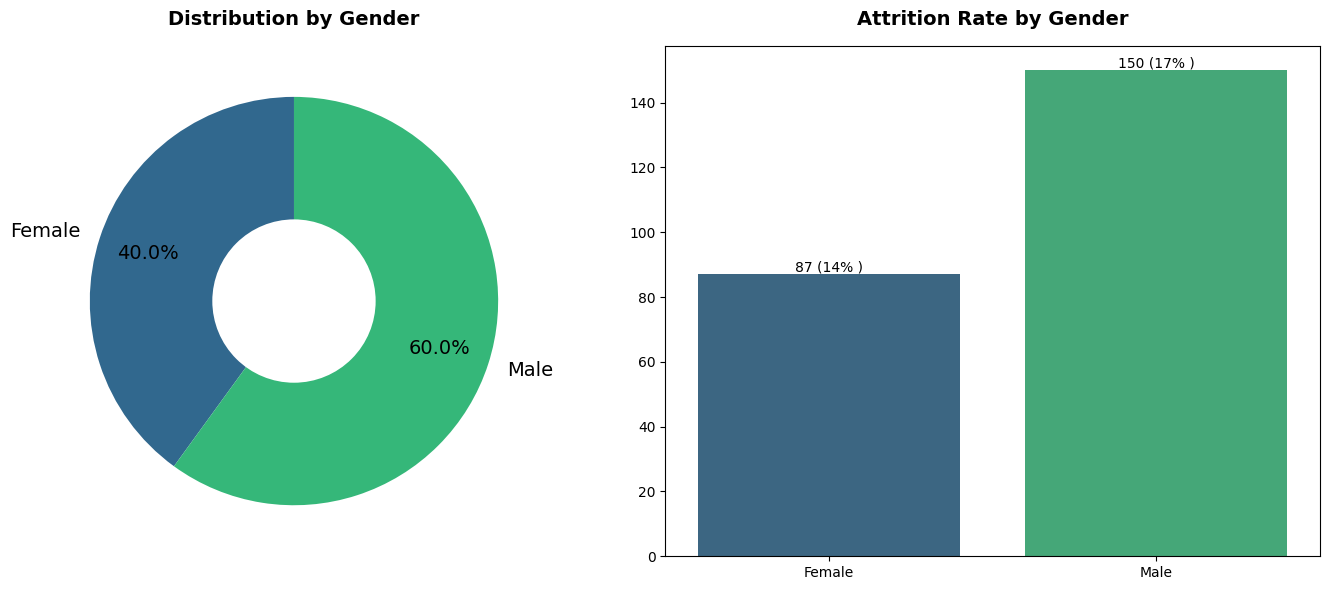

In [14]:
pie_bar_plot(df, 'Gender','Attrition' )


A presença de funcionários do sexo masculino é mais significativa em comparação com o sexo feminino, o que pode explicar a predominância de saídas entre os funcionários do sexo masculino.

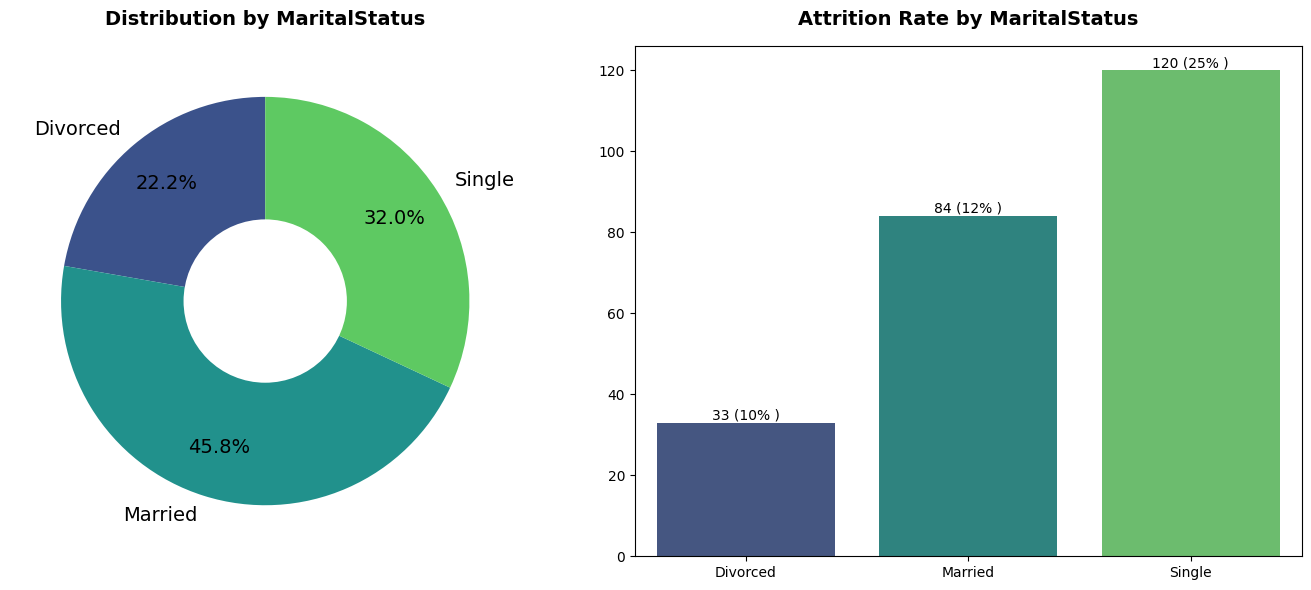

In [15]:
pie_bar_plot(df, 'MaritalStatus', 'Attrition')

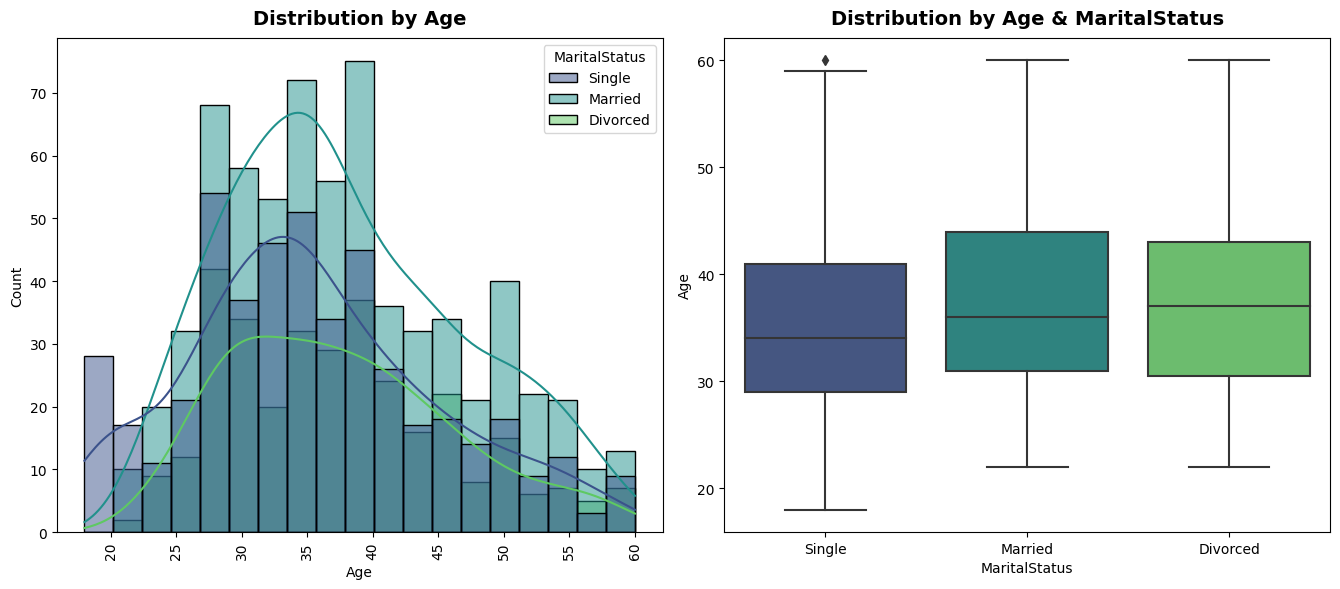

In [16]:
hist_with_box (df, 'Age', 'MaritalStatus')

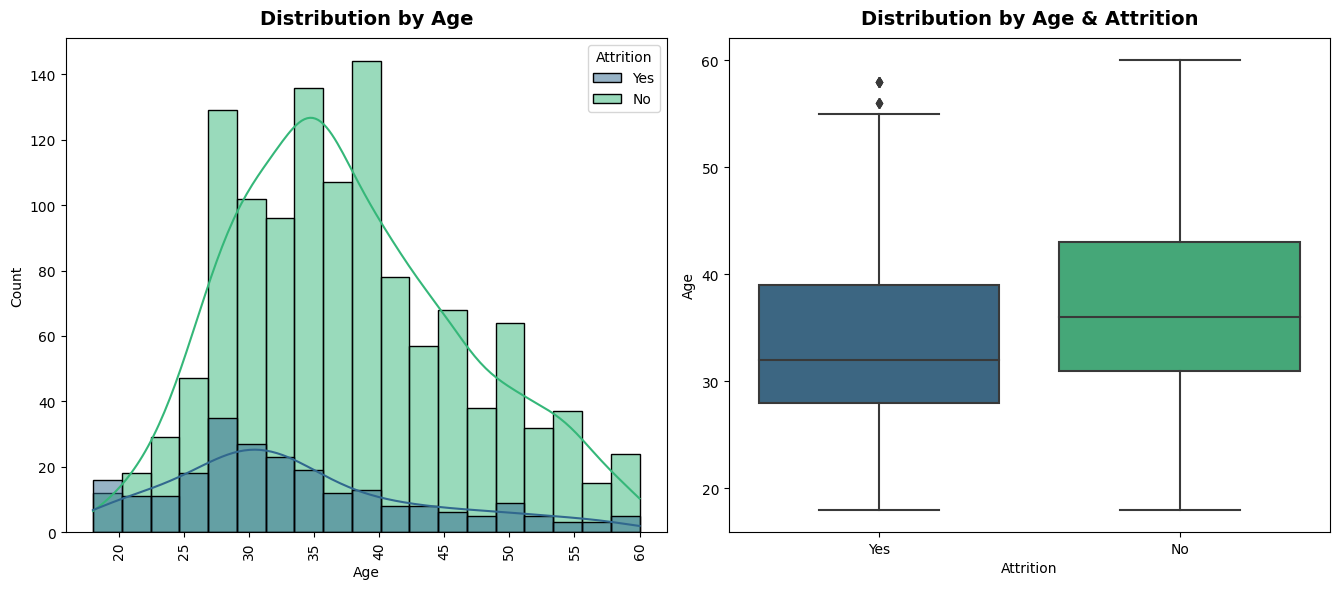

In [17]:
hist_with_box (df, 'Age', 'Attrition')

Dentro da faixa etária de 27 a 40 anos, tanto entre os casados quanto os solteiros, que juntos constituem mais de 70% da força de trabalho da empresa, observa-se uma concentração significativa de rotatividade.

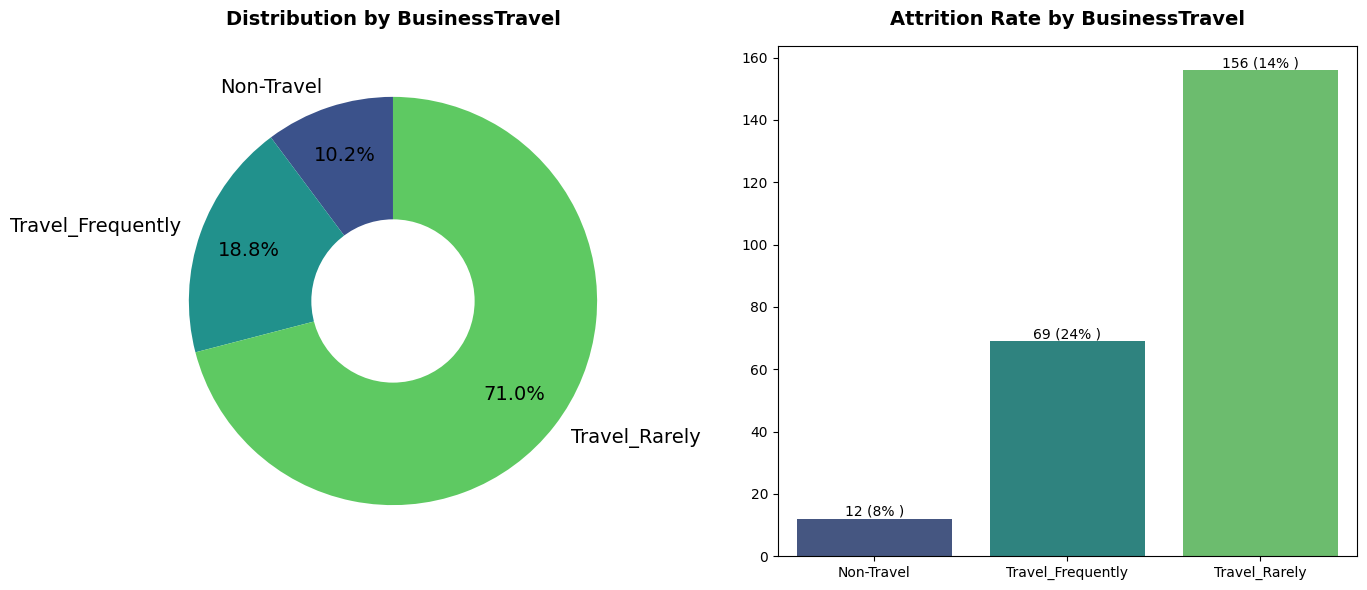

In [18]:
pie_bar_plot(df, 'BusinessTravel', 'Attrition')

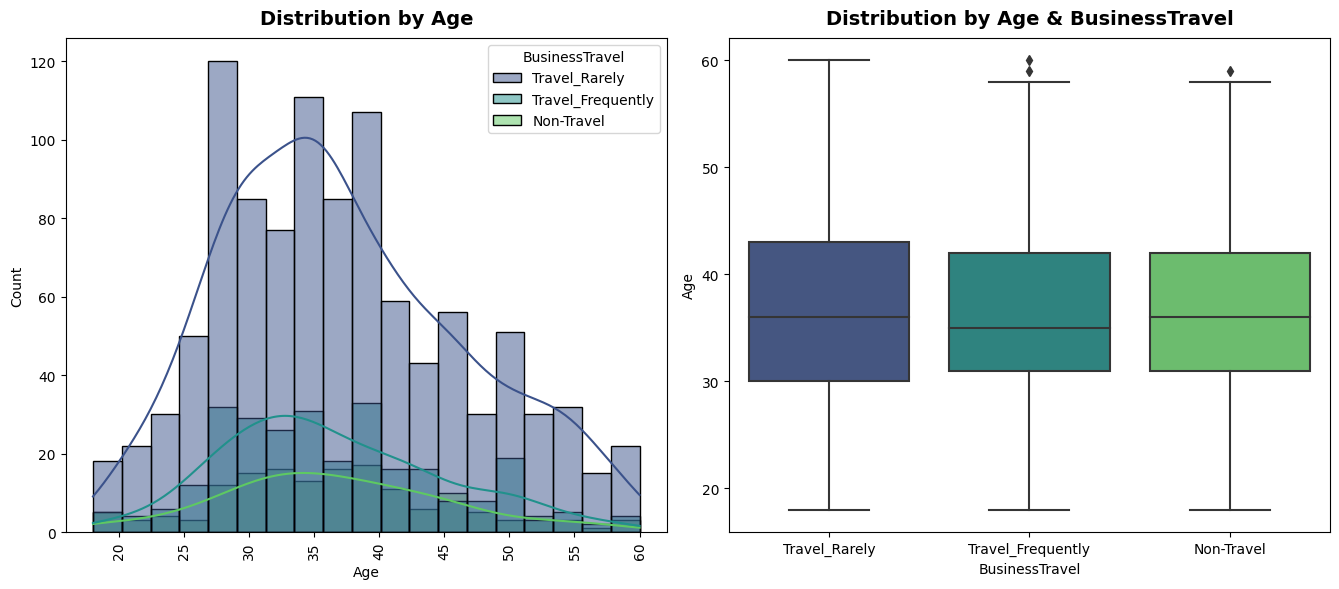

In [19]:
hist_with_box (df, 'Age', 'BusinessTravel')

Predominantemente, os colaboradores na empresa realizam viagens com pouca frequência. Contudo, nota-se que a maior taxa de rotatividade ocorre entre aqueles que viajam com frequência. Em contrapartida, os funcionários que optam por não viajar apresentam a menor taxa de rotatividade na organização.

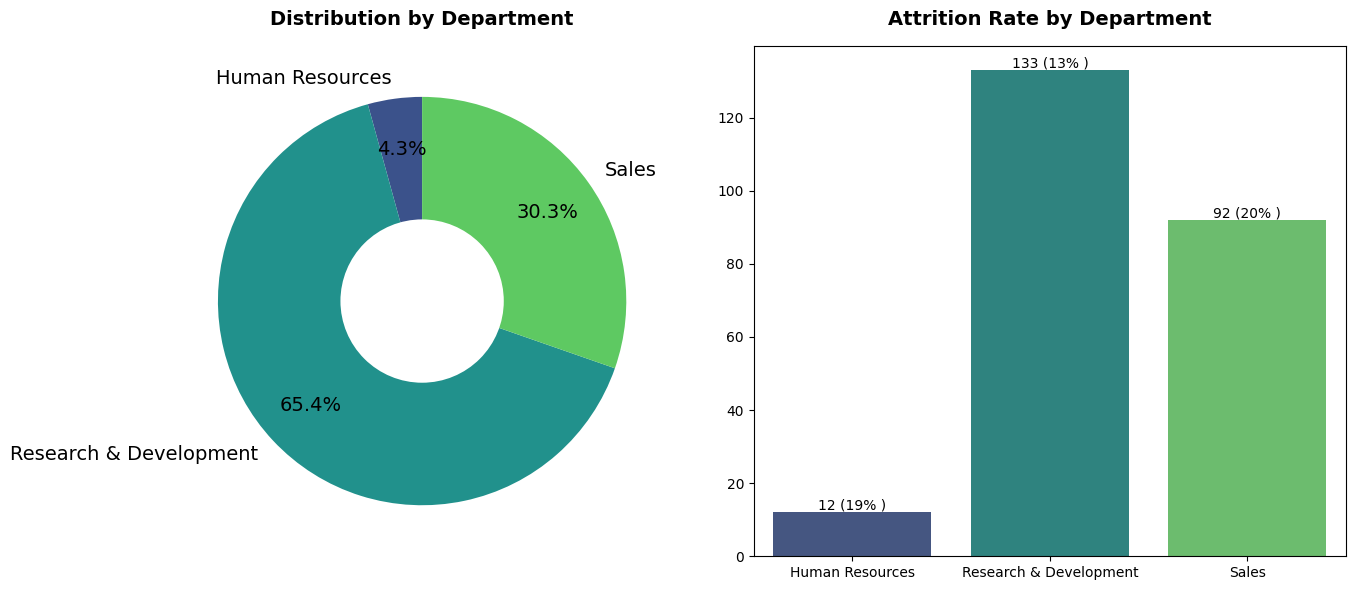

In [20]:
pie_bar_plot(df, 'Department', 'Attrition')

A maior parte dos colaboradores está vinculada ao Departamento de Pesquisa e Desenvolvimento, representando 65,4% do total. Notavelmente, a taxa mais alta de rotatividade ocorre no Departamento de Vendas, seguido por uma taxa igualmente elevada no Departamento de Recursos Humanos. Em contraste, o Departamento de Pesquisa e Desenvolvimento apresenta a menor taxa de atrito em comparação com os demais setores.

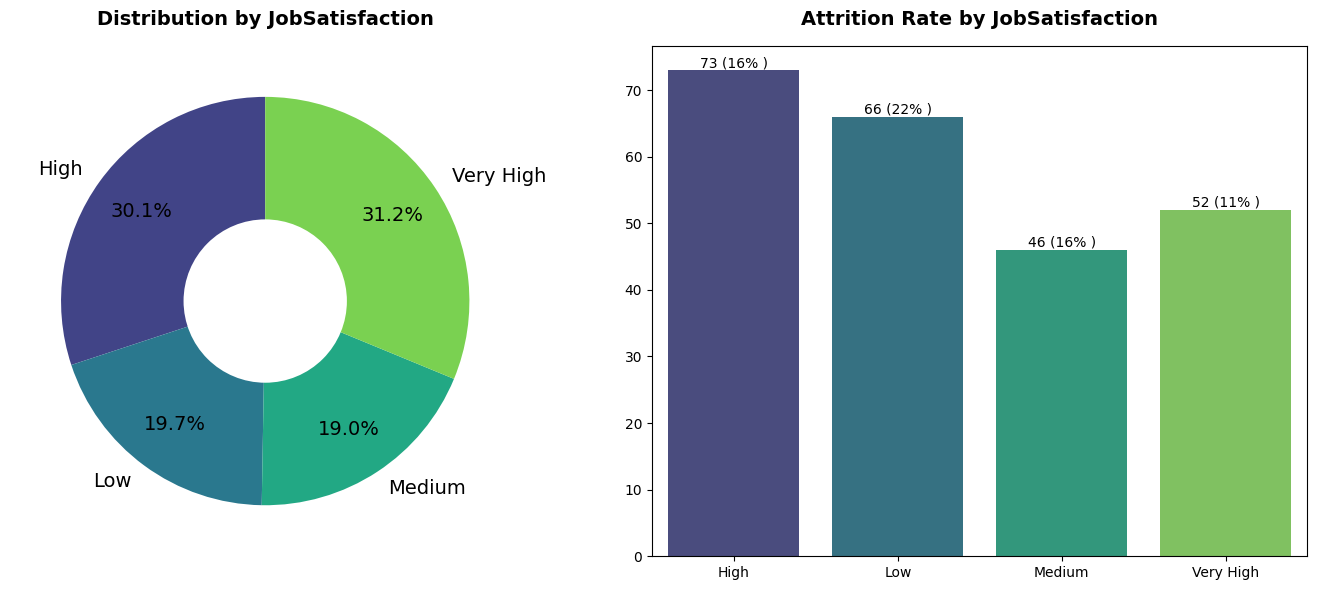

In [21]:
pie_bar_plot(df, 'JobSatisfaction', 'Attrition')

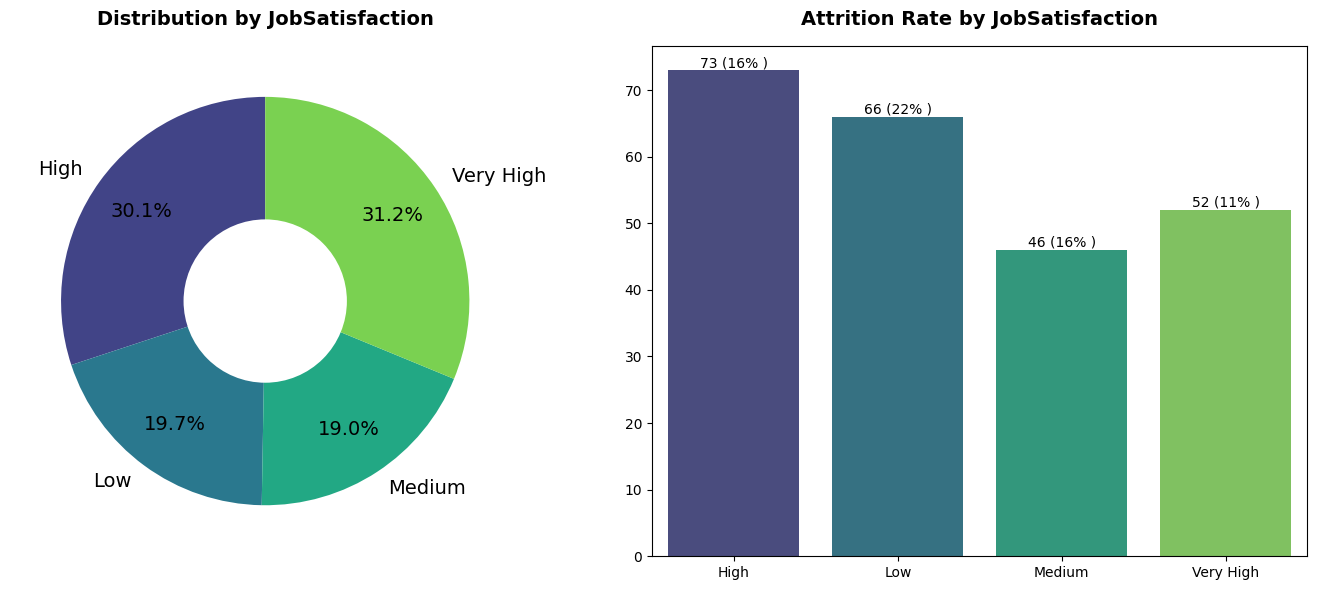

In [22]:
pie_bar_plot(df, 'JobSatisfaction', 'Attrition')

## 4 Pré-processamento dos dados

### 4.1 Encoding

In [23]:
# Retorno para os valores numericos os valores

column_mappings = {
    "EnvironmentSatisfaction": {"Low": 0, "Medium": 1, "High": 2, "Very High": 3},
    "JobInvolvement": {"Low": 0, "Medium": 1, "High": 2, "Very High": 3},
    "JobSatisfaction": {"Low": 0, "Medium": 1, "High": 2, "Very High": 3},
    "PerformanceRating": {"Low": 0, "Good": 1, "Excellent": 2, "Outstanding": 3},
    "RelationshipSatisfaction": {"Low": 0, "Medium": 1, "High": 2, "Very High": 3},
    "WorkLifeBalance": {"Bad": 0, "Good": 1, "Better": 2, "Best": 3},
    "Education": {"Below College": 0, "College": 1, "Bachelor": 2, "Master": 3, "Doctor": 4},
    "JobLevel": {"Entry Level": 0, "Junior Level": 1, "Mid Level": 2, "Senior Level": 3, "Executive Level": 4},
    "Gender": {"Female": 0, "Male": 1},
    "Attrition": {"No": 0, "Yes": 1}
}

df.replace(column_mappings, inplace=True)

In [24]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [25]:
#Transformo os dados em categoricos em numericos

le = LabelEncoder()

df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['Department'] = le.fit_transform(df['Department'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['JobRole'] = le.fit_transform(df['JobRole'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['OverTime'] = le.fit_transform(df['OverTime'])



In [26]:
# separo os dados em x e y

x = df.drop(['Attrition'], axis=1)
y = df[['Attrition']]

test_size=0.30 # Tamanho do conjunto de teste
seed = 42 # semente aleatória
num_particoes=10
scoring='accuracy'


In [27]:
# faço um balanciamento dos dados utilizando o Smote
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)
print(y.value_counts())
print('===============')
print(y_smote.value_counts())

Attrition
0            1233
1             237
dtype: int64
Attrition
0            1233
1            1233
dtype: int64


In [28]:
# treino meu modelo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=test_size,
                                                    shuffle=True,
                                                    random_state=seed) # holdout com estratificação

kfold = StratifiedKFold(n_splits=num_particoes,
                        shuffle=True,
                        random_state=seed) #validação cruzada com estratificação

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 30)
(441, 30)
(1029, 1)
(441, 1)


## 4.Modelagem e Inferência

###### **Criação e avaliação de modelos:linha base**

######Irei construir um algoritmo que irá realizar uma comparação de desempenho de vários modelos de classificação usando a técnica de validação cruzada. Ele criará e avaliará diferentes modelos, armazenando os resultados em uma lista de e, em seguida criará um boxplot para comparar o desempenho dos modelos.

LR: 0.869 (0.018)
KNN: 0.846 (0.011)
CART: 0.783 (0.044)
NB: 0.751 (0.054)
SVM: 0.858 (0.010)
Bagging: 0.850 (0.021)
RF: 0.854 (0.020)
ET: 0.858 (0.026)
Ada: 0.842 (0.026)
GB: 0.855 (0.023)
Voting: 0.859 (0.015)


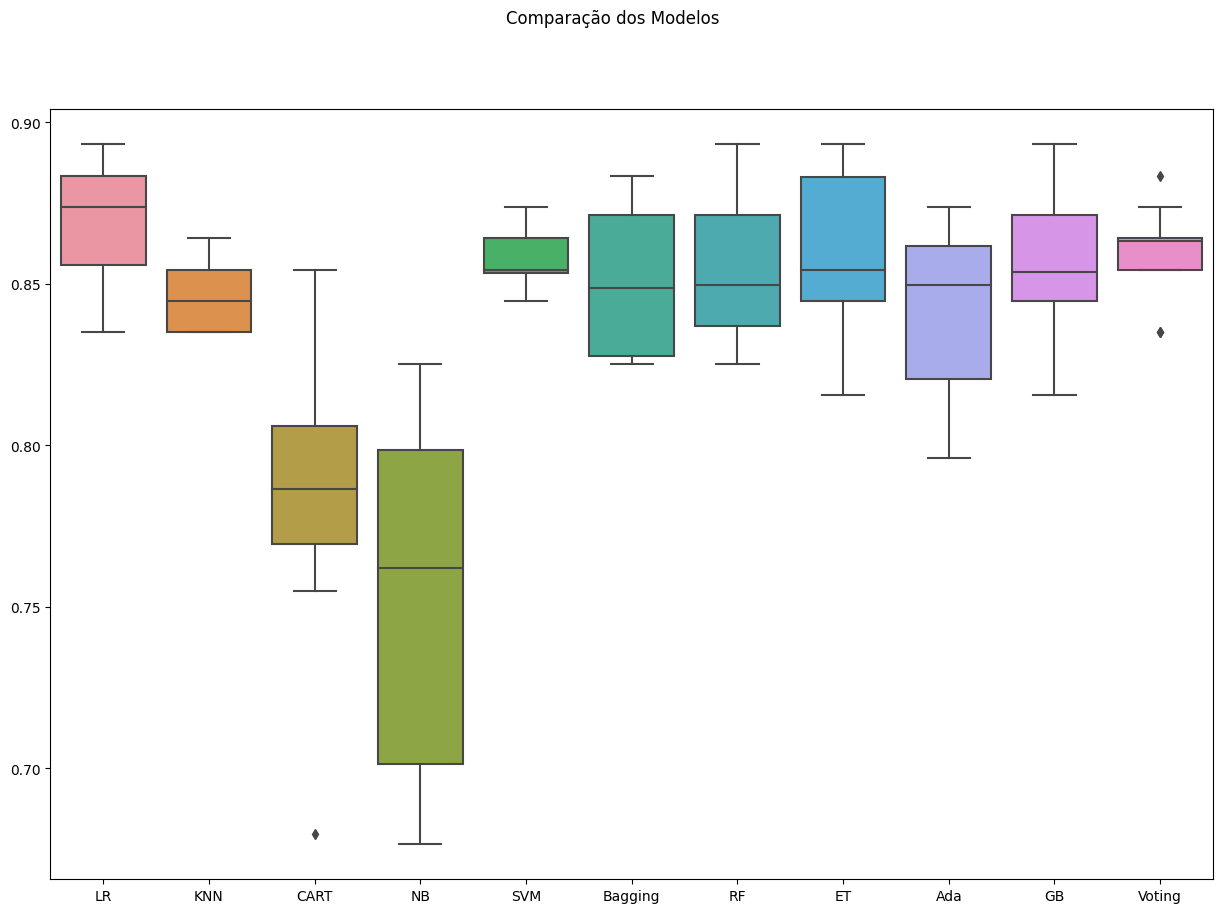

In [59]:
np.random.seed(9) # definindo uma semente global para este bloco
num_trees = 400
max_features = 1000
max_iter = 1000

# Listas para armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results=[]
names=[]

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=max_iter)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=max_iter)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(("cart", model2))
model3 = SVC()
bases.append(('SVM', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(estimators=bases)))

# Criando os pipelines para cada modelo
pipelines = []
for name, model in models:
    pipeline = Pipeline([("Scaler", StandardScaler()), (name, model)])
    pipelines.append((name, pipeline))

# Executando os pipelines
results = []
names = []
for name, model in pipelines:
    # Usando ravel() para transformar y em um vetor unidimensional
    y_train_array = y_train.iloc[:, 0].values.ravel()
    cv_results = cross_val_score(model, X_train, y_train_array, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.show()



LR-orig: 0.858 (0.018)
KNN-orig: 0.830 (0.015)
CART-orig: 0.781 (0.033)
NB-orig: 0.748 (0.052)
SVM-orig: 0.843 (0.004)
Bag-orig: 0.853 (0.021)
RF-orig: 0.854 (0.019)
ET-orig: 0.857 (0.027)
Ada-orig: 0.842 (0.026)
GB-orig: 0.855 (0.024)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Vot-orig: 0.851 (0.016)
LR-padr: 0.868 (0.020)
KNN-padr: 0.846 (0.011)
CART-padr: 0.781 (0.043)
NB-padr: 0.751 (0.054)
SVM-padr: 0.858 (0.010)
Bag-padr: 0.855 (0.020)
RF-padr: 0.857 (0.020)
ET-padr: 0.854 (0.029)
Ada-padr: 0.842 (0.026)
GB-padr: 0.854 (0.022)
Vot-padr: 0.855 (0.015)
LR-norm: 0.871 (0.014)
KNN-norm: 0.844 (0.015)
CART-norm: 0.785 (0.029)
NB-norm: 0.751 (0.054)
SVM-norm: 0.857 (0.011)
Bag-norm: 0.854 (0.020)
RF-norm: 0.853 (0.018)
ET-norm: 0.861 (0.031)
Ada-norm: 0.842 (0.026)
GB-norm: 0.855 (0.022)
Vot-norm: 0.858 (0.016)


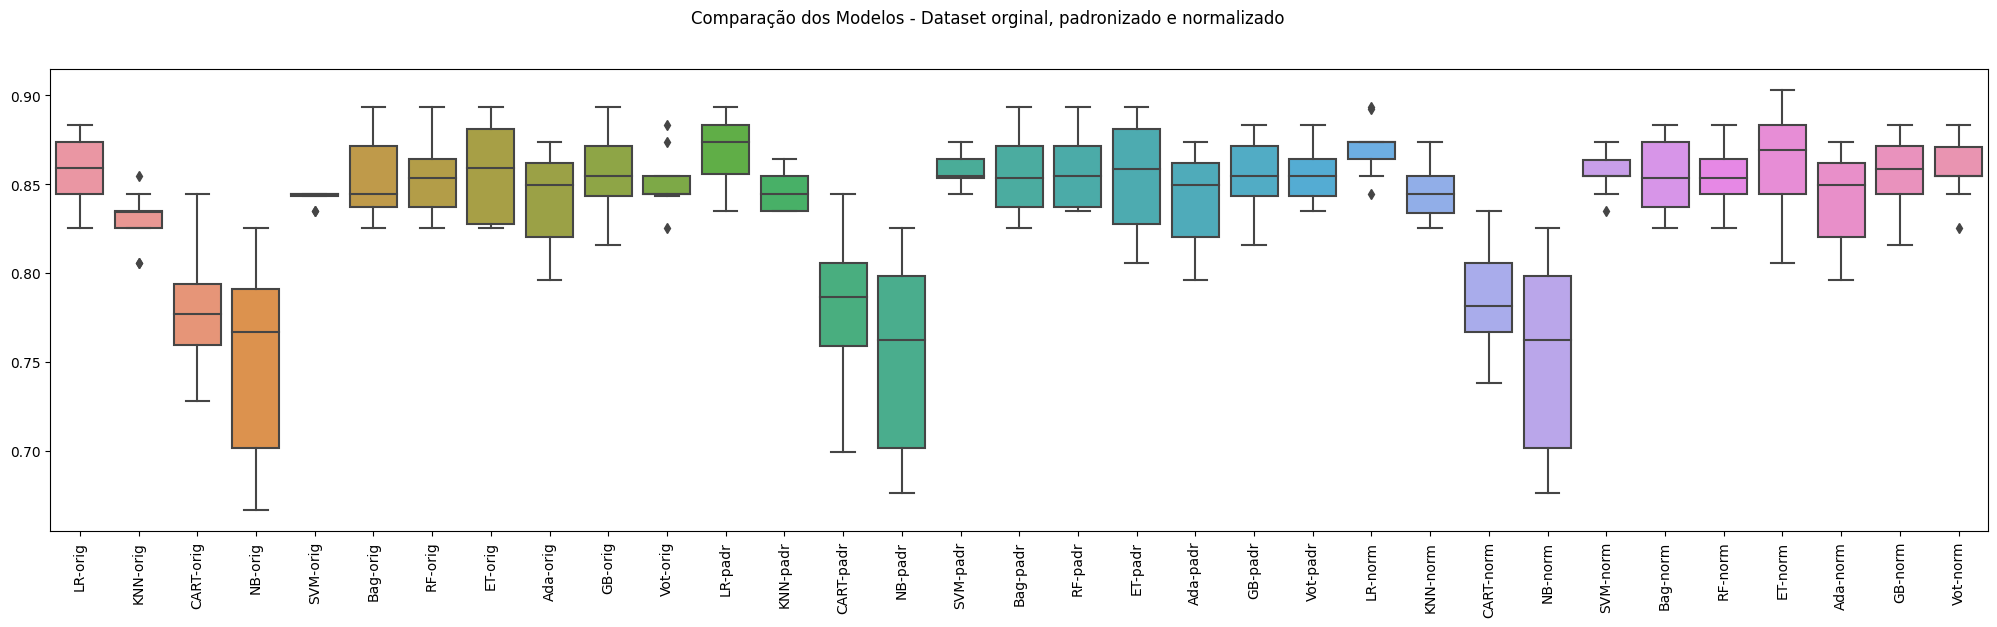

In [66]:
# Listas para armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results=[]
names=[]

#Criando os elementos do pipeline

#Algoritimo que serão utilizados
reg_log = ('LR', LogisticRegression(solver='liblinear', max_iter=max_iter))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

#Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ("MinMaxScaler", MinMaxScaler())

#Montando os pipelines

pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    # Usando ravel() para transformar y em um vetor unidimensional
    y_train_array = y_train.iloc[:, 0].values.ravel()
    cv_results = cross_val_score(model, X_train, y_train_array, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names, rotation=90)
plt.show()
